In [1]:
from specific_dataset import *
from specific_train import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
batch_size = 32


train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)), transforms.RandomRotation(10),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = HDataset(data_type='train', transform=train_transform)
val_dataset = HDataset(data_type='val', transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [4]:
Mmodel = Baseline(model='resnet18', num_classes=48, tag='M')
Mmodel.model.load_state_dict(torch.load('./M_7_40.pt'))
Mmodel.model.eval()

In [ ]:
Hmodel = Baseline(model='resnet18', num_classes=2, tag='H')
Hmodel.model.load_state_dict(torch.load('./H_0_15.pt'))
Hmodel.model.eval()

In [ ]:
LRBmodel = Baseline(model='resnet18', num_classes=3, tag='LRB')
LRBmodel.model.load_state_dict(torch.load('./LRB_4_120.pt'))
LRBmodel.model.eval()

In [5]:
epochs = 1
lr = 0.0005
weight_decay = 0.00001

In [6]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 0.777173, Test Loss : 0.154612, Train Acc : 62.500000, Test Acc : 98.505435
Best Model Saved
Iteration : 6 - Train Loss : 0.000312, Test Loss : 0.000014, Train Acc : 100.000000, Test Acc : 100.000000
Best Model Saved
Iteration : 11 - Train Loss : 0.002149, Test Loss : 0.000000, Train Acc : 100.000000, Test Acc : 100.000000
Best Model Saved
Iteration : 16 - Train Loss : 0.000654, Test Loss : 0.000000, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 21 - Train Loss : 0.000002, Test Loss : 0.000000, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 26 - Train Loss : 0.000011, Test Loss : 0.000000, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 31 - Train Loss : 0.000003, Test Loss : 0.000000, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 36 - Train Loss : 0.000005, Test Loss : 0.000001, Train Acc : 100.000000, Test Acc : 100.000000
Iteration : 41 - Train Loss : 0.000012, Test Loss : 0

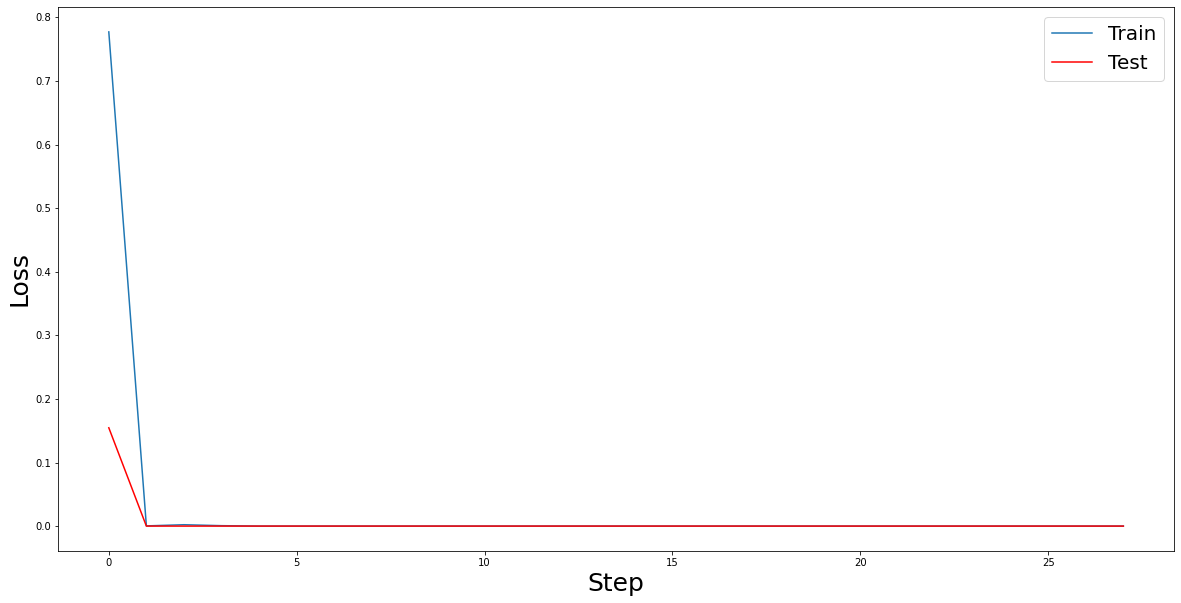

In [7]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

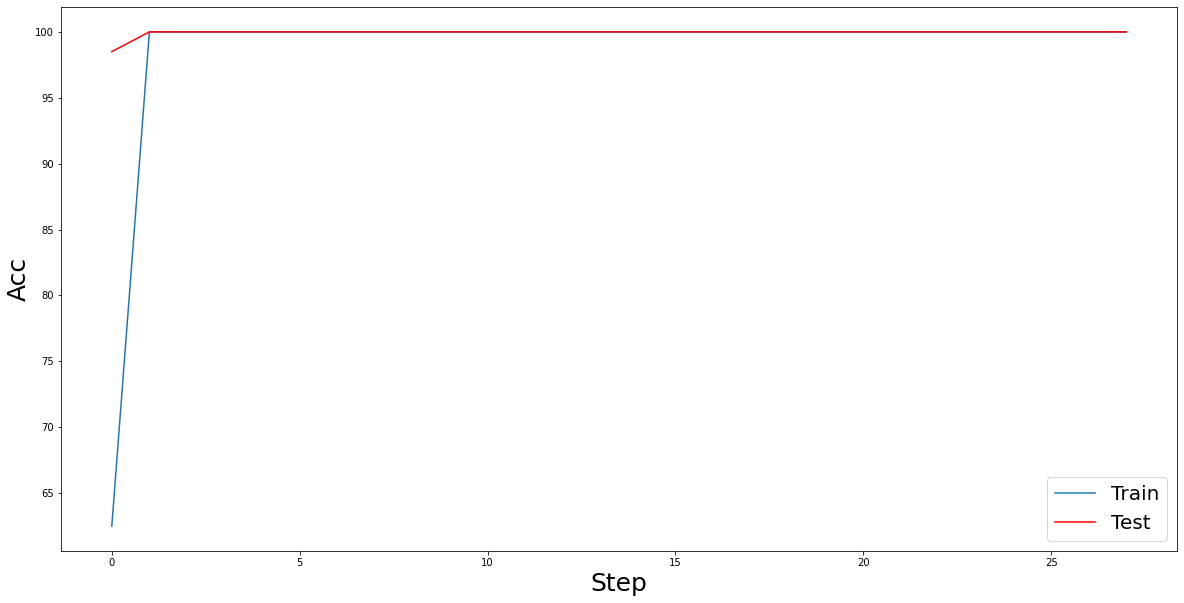

In [8]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()